In [1]:
from variable_dropout import variable_dropout
from plot_variable_dropout import plot_variable_dropout
import pandas as pd
from numpy import random
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
import sklearn as sk

In [3]:
rng = random.RandomState(0)

In [4]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [5]:
dataset = datasets.load_breast_cancer()

X = pd.DataFrame(dataset.data)
Y=dataset['target']

In [6]:
model_rf = RandomForestClassifier()
model_rf.fit(X = X, y=Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
importance_rf = variable_dropout(model_rf, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

D:\Programs\Anaconda\lib\site-packages\pandas\core\generic.py:5799: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


In [11]:
print("Random Forest Importance")
print(importance_rf)

Random Forest Importance
_baseline_      0.83969
27              0.39661
13              0.38345
20              0.38135
21              0.37876
7               0.38139
23              0.38145
12              0.37614
6               0.37351
10              0.37444
11              0.37416
22              0.37592
26              0.37550
0               0.37362
1               0.37488
2               0.37327
19              0.37311
24              0.37354
17              0.37313
28              0.37333
3               0.37245
4               0.37245
5               0.37383
8               0.37245
9               0.37321
14              0.37245
15              0.37245
16              0.37245
18              0.37246
25              0.37344
29              0.37245
_full_model_    0.37245
dtype: float64


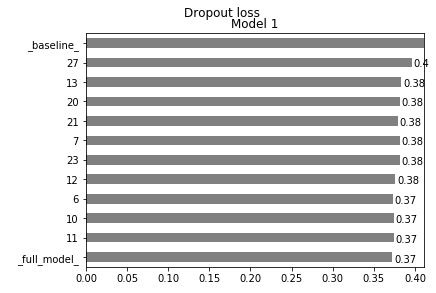

In [12]:
plot_variable_dropout(importance_rf)

In [13]:
#another model
model_lr = LogisticRegression()

model_lr.fit(X,y=Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
importance_lr = variable_dropout(model_lr, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

D:\Programs\Anaconda\lib\site-packages\pandas\core\generic.py:5799: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


In [15]:
importance_lr

_baseline_      0.83425
23              0.88414
22              0.60279
0               0.50954
13              0.50318
21              0.47533
20              0.47676
2               0.43582
3               0.43081
26              0.41740
25              0.41527
6               0.41144
28              0.41182
4               0.41047
5               0.41051
7               0.41047
8               0.41047
9               0.41047
10              0.41047
12              0.41049
14              0.41047
15              0.41047
16              0.41047
17              0.41047
18              0.41047
19              0.41047
24              0.41047
27              0.41164
29              0.41047
11              0.41585
1               0.41020
_full_model_    0.41047
dtype: float64

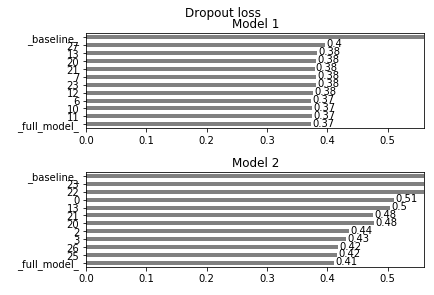

In [16]:
#model comparison

plot_variable_dropout(importance_rf, importance_lr)

In [17]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
dataset = datasets.load_breast_cancer()

X = pd.DataFrame(dataset.data)
Y=dataset['target']

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X=X, y=Y)

In [ ]:
importance_xgb = variable_dropout(model_xgb, X, Y, loss_function=sk.metrics.hinge_loss, random_state=rng)

In [ ]:
print(importance_xgb)

In [ ]:
plot_variable_dropout(importance_rf, importance_lr, importance_xgb)
